# Traffic and accidents in the United Kingdom
## Stefano Orani
### 23/04/2018

In this blog post, we analyse accidents and traffic data in the United Kingdom. The data are available for download on [kaggle](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales) and contain UK government records of traffic from 2000 to 2016, as well as accidents recorded between 2005-2007 and 2009-2014. Using `python` and its modules `pandas`, `numpy`, `glob`, `folium` and `seaborn` we will visualise different aspects of the data and try to get some insight into trends and evolution of accidents and traffic in the UK.  

In particular, we will compare trends in London, one of the major metropolitan areas in the world, to trends in the whole of the UK. We will also try to identify correlations between traffic demographics and accident rates. But let's get started.

## Introduction to the datasets

To obtain the data, click on the download link on the dataset's page on kaggle. This downloads a zip file, which we assume has been extracted in the directory where the lines of code below are exectued. 

In [11]:
import pandas as pd # contains definition of dataframe objects, analogous to R data.table package
import numpy as np  # defines numerical operations on vectors and matrices, as well as functions. Defines arrays
import glob         # allows to define list of files using regex

# UPLOPAD THE ACCIDENT DATA
files_ls = glob.glob('accidents*csv') 

dfs = []
for f in files_ls:
    dfs.append(pd.read_csv(f, dtype='unicode'))

df_acc = pd.concat(dfs)
df_acc = df_acc.reset_index(drop=True)

# check for duplicates and keep first
df_acc = df_acc.drop_duplicates(keep="first")

# convert convertible columns to floats
df_acc = df_acc.apply(pd.to_numeric, errors='ignore')

# UPLOPAD THE TRAFFIC DATA
df_traffic = pd.read_csv("./ukTrafficAADF.csv", dtype='unicode')

# check for duplicates and keep first
df_traffic = df_traffic.drop_duplicates(keep="first")

# convert convertible columns to floats
df_traffic = df_traffic.apply(pd.to_numeric, errors='ignore')

An overview of the dataframes can be printed using the `pandas` function `describe()`. This function provides some descriptive statistiscs of the tables, for each column, such as number of elements, mean, standard deviation, extrema and a few quantiles.

#### df_accidents:

In [12]:
df_acc.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.469894e+06,1.469894e+06,1.469894e+06,1.469894e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06,0.0,1.469995e+06,1.469995e+06,1.469995e+06,1.469995e+06
mean,4.398972e+05,2.986746e+05,-1.432652e+00,5.257597e+01,3.078191e+01,2.838774e+00,1.831846e+00,1.350891e+00,4.118639e+00,3.535705e+02,4.089804e+00,1.008856e+03,3.907896e+01,NaN,2.663909e+00,3.800811e+02,1.356722e+00,2.009309e+03
std,9.553525e+04,1.612611e+05,1.404330e+00,1.452076e+00,2.551827e+01,4.014209e-01,7.152256e-01,8.257998e-01,1.924702e+00,2.592795e+02,1.429898e+00,1.821693e+03,1.417134e+01,NaN,3.207808e+00,1.300899e+03,4.792192e-01,3.021200e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.757500e+05,1.780082e+05,-2.363678e+00,5.148790e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.409300e+05,2.653400e+05,-1.391637e+00,5.227671e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.232900e+05,3.966000e+05,-2.184820e-01,5.346436e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,6.000000e+00,7.260000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


The accidents data contains 33 columns, many of which are not really useful for our purposes. For instance the first 2 columns contain accidents points locations in Easting and Northing coordinates, a cartesian reference system that takes into account the shape of the Earth's surface in a particular region and allows for accurate distance measurements. We will not use them, working instead with the usual Longitude and Latitude.  

Looking at the summary statistics, one can identify outliers, for examples if the maximum or minimum of a given column is outside a reasonable range.

#### df_traffic:

In [13]:
df_traffic.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
count,275385.000000,275385.000000,275385.000000,2.753850e+05,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,...,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000
mean,2007.967907,47277.490437,425675.250780,3.561826e+05,2.757116,1.712899,123.314654,222.099297,16813.332923,248.662175,...,489.379193,83.551450,88.924513,74.249433,247.927389,271.747354,1255.774163,21152.693542,53.092936,-1.654634
std,4.862875,27004.889605,98687.570954,1.869923e+05,3.815569,2.371086,421.440798,420.874069,16618.266842,374.650774,...,683.713666,121.773472,142.005359,183.767833,752.311296,835.966781,2446.175298,21536.689989,1.681459,1.478250
min,2000.000000,60.000000,69987.000000,7.625000e+04,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.583853,-7.442680
25%,2004.000000,26218.000000,352970.000000,1.921200e+05,0.600000,0.370000,5.000000,58.000000,7125.000000,60.000000,...,148.000000,24.000000,15.000000,7.000000,9.000000,10.000000,252.000000,8941.000000,51.614977,-2.711540
50%,2008.000000,47252.000000,430000.000000,3.240000e+05,1.400000,0.870000,26.000000,113.000000,12255.000000,127.000000,...,273.000000,46.000000,41.000000,20.000000,34.000000,37.000000,489.000000,15143.000000,52.807705,-1.549475
75%,2012.000000,74392.000000,510600.000000,4.296000e+05,3.200000,1.990000,83.000000,214.000000,19951.000000,280.000000,...,517.000000,91.000000,100.000000,56.000000,125.000000,137.000000,1041.000000,24660.000000,53.760638,-0.389834
max,2016.000000,99967.000000,655040.000000,1.205400e+06,55.500000,34.490000,18629.000000,9815.000000,207133.000000,11359.000000,...,10942.000000,5968.000000,3684.000000,3949.000000,11034.000000,13758.000000,27095.000000,262842.000000,60.727231,1.754553


The traffic data contains 21 columns, of which, again, we will use only a few.

## Interactive and animated maps 

Using `folium`, a python wrapper for `leaflet`, we can generate maps as illustrated with `R` in the previous posts. As a first illustration, let us create a heatmap animation of accident locations in London from 2004 to 2014, excluding 2008:   

In [23]:
import folium # contains leaflet wrappers for python
from folium import plugins

# select london area (around Big Ben)
df_london = df_acc[df_acc['Latitude'] < 51.5007+0.03]
df_london = df_london[df_london['Latitude'] > 51.5007-0.03]
df_london = df_london[df_london['Longitude'] < -0.1246+0.08]
df_london = df_london[df_london['Longitude'] > -0.1246-0.08]

map_london = folium.Map(location=[51.5007, -0.1246], tiles="Stamen Toner", zoom_start=13) 

heat_df = df_london[['Latitude', 'Longitude']].copy()

# Create weight column, using date
months = df_london['Date'].str[3:5]
years = df_london['Date'].str[6:10]
months = [float(i) for i in months]
years = [float(i) for i in years]
months = np.array(months)
years = np.array(years)
weights = years+months/100

unique_weights = np.unique(weights)
hmap_weights = unique_weights[0::10]

heat_df['Weight'] = weights
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude', 'Longitude', 'Weight'])

# List comprehension to create list of lists
heat_data = [[[row['Latitude'], row['Longitude']] 
              for index, row in heat_df[heat_df['Weight'] == i].iterrows()] 
             for i in hmap_weights]
# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.8, radius = 20)
hm.add_to(map_london)
# Display the map
map_london

We can do the same for traffic jams in London:

In [24]:
map_london = folium.Map(location=[51.5007, -0.1246], tiles="Stamen Toner", zoom_start=13) 

df_traffic_london = df_traffic[df_traffic['Region'] == 'London']

# List comprehension to create list of lists
heat_data = [[[row['Lat'], row['Lon'], row["AllMotorVehicles"]] 
              for index, row in df_traffic_london[df_traffic_london['AADFYear'] == i].iterrows()]
             for i in set(df_traffic_london.AADFYear)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.8, radius = 20)
hm.add_to(map_london)
# Display the map
map_london

In truth, recorded traffic jams locations do not vary a lot across the years, and the heatmap does not allow to discern any change in intensity either. This might be due to the fact that traffic is measured at some fixed points, which do not change.  
Nevertheless, it looks like there is a correlation between traffic jams and accidents locations.

## Grouping, counting and plotting

As in `R` with `data.table`, `pandas`' dataframe incorporates many SQL-like functionalities. For instance we can count accidents grouped by severity on a scale ranging from 1 to 3, 1 being fatal, 2 serious and 3 slight, and plot their evolution. Let us do this for London and for the whole of the UK separately, and display the plots next to each other:

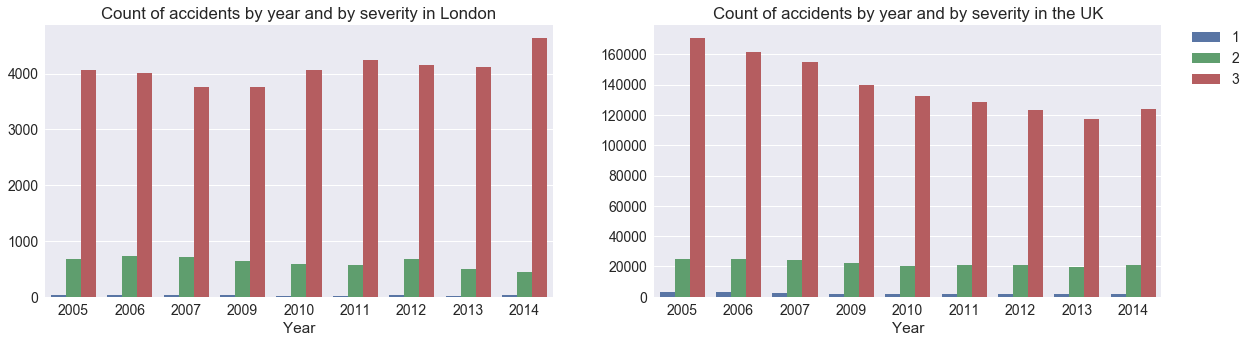

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# accident severity by year in London
grp_london = df_london.groupby(["Year", "Accident_Severity"])
grp_london = grp_london.size().reset_index(name='counts')

# accident severity by year in UK
grp_uk = df_acc.groupby(["Year", "Accident_Severity"])
grp_uk = grp_uk.size().reset_index(name='counts')

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Year", y = "counts", hue = "Accident_Severity", data = grp_london)
bplot.set_title("Count of accidents by year and by severity in London")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(1, 2, 2)
bplot = sns.barplot(x = "Year", y = "counts", hue = "Accident_Severity", data = grp_uk)
bplot.set_title("Count of accidents by year and by severity in the UK")
bplot.set_ylabel("")
# place the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It is clear that London and the UK are not following the same trend: whereas in the UK slight accidents are decreasing, in London they seem to be increasing. But... Looking closer, London represents approximately 2.5% of all slight accidents, which, in light of the fact that London has close to 10% of the total population of the UK, proves that London is doing a better job than the rest of the country to prevent traffic accidents.  

Regarding the trends of accidents of severity 1 or 2, it is less clear from the above plots what the trends are, but it seems severity 2 is fluctuating with no clear trend. Let's have yet another closer look:

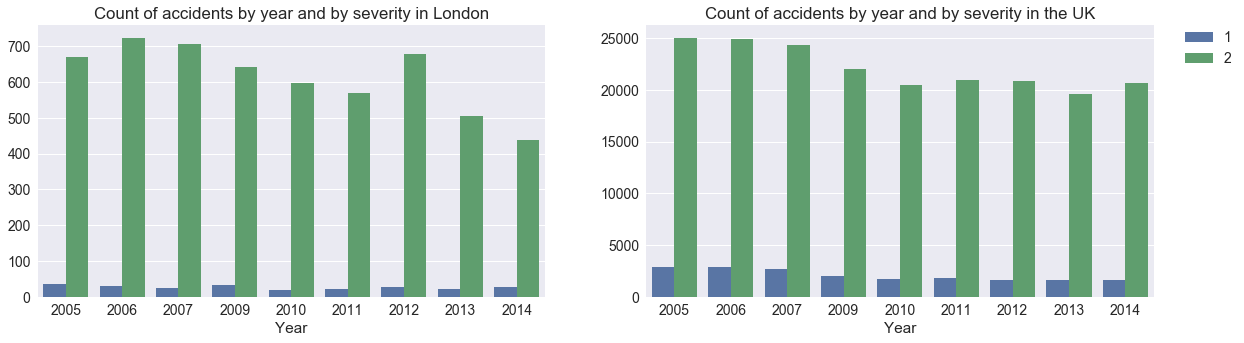

In [18]:
# accident severity by year in London
grp_london = df_london.groupby(["Year", "Accident_Severity"])
grp_london = grp_london.size().reset_index(name='counts')
grp_london =  grp_london[grp_london["Accident_Severity"] != 3] # exclude accidents of severity 3

# accident severity by year in UK
grp_uk = df_acc.groupby(["Year", "Accident_Severity"])
grp_uk = grp_uk.size().reset_index(name='counts')
grp_uk =  grp_uk[grp_uk["Accident_Severity"] != 3] # exclude accidents of severity 3

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Year", y = "counts", hue = "Accident_Severity", data = grp_london)
bplot.set_title("Count of accidents by year and by severity in London")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(1, 2, 2)
bplot = sns.barplot(x = "Year", y = "counts", hue = "Accident_Severity", data = grp_uk)
bplot.set_title("Count of accidents by year and by severity in the UK")
bplot.set_ylabel("")
# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now it is clearer: accidents of severity 1 and 2 seem to be in a decreasing trend both in London and in the rest of the UK. Also, the year 2012 was a bad year for London's drivers. Perhaps because of the Olympics?  

Let us now have a look at casualties, defined as people at least injured in an accident. Are they decreasing? Are they following the same trends as the total number of accidents?


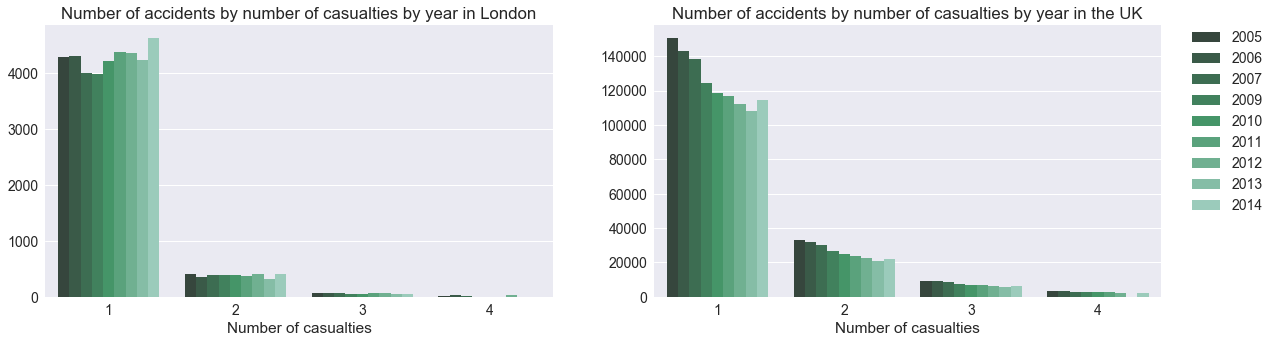

In [19]:
# casualties by year in London
grp_london = df_london.groupby(["Year", "Number_of_Casualties"])
grp_london = grp_london.size().reset_index(name='counts')

# casualties by year in UK
grp_uk = df_acc.groupby(["Year", "Number_of_Casualties"])
grp_uk = grp_uk.size().reset_index(name='counts')

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Number_of_Casualties", y = "counts", hue = "Year", palette="BuGn_d", 
                    data= grp_london[grp_london["counts"]>20])
bplot.set_title("Number of accidents by number of casualties by year in London")
bplot.set_xlabel("Number of casualties")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(1, 2, 2)
bplot = sns.barplot(x = "Number_of_Casualties", y = "counts", hue = "Year", palette="BuGn_d", 
                    data= grp_uk[grp_uk["counts"]>2000])
bplot.set_title("Number of accidents by number of casualties by year in the UK")
bplot.set_xlabel("Number of casualties")
bplot.set_ylabel("")
# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Casualty numbers tell the same story as the accident severity plots. On the one hand, London has a lower share of casualties compared to its population than the UK. On the other hand, the trend is towards decreasing numbers in the UK, while in London numbers seem to be randomly fluctuating. 

Let's now have a look at the number of accidents by posted speed limit on the accident's streets. Are we going to see again the same trends?

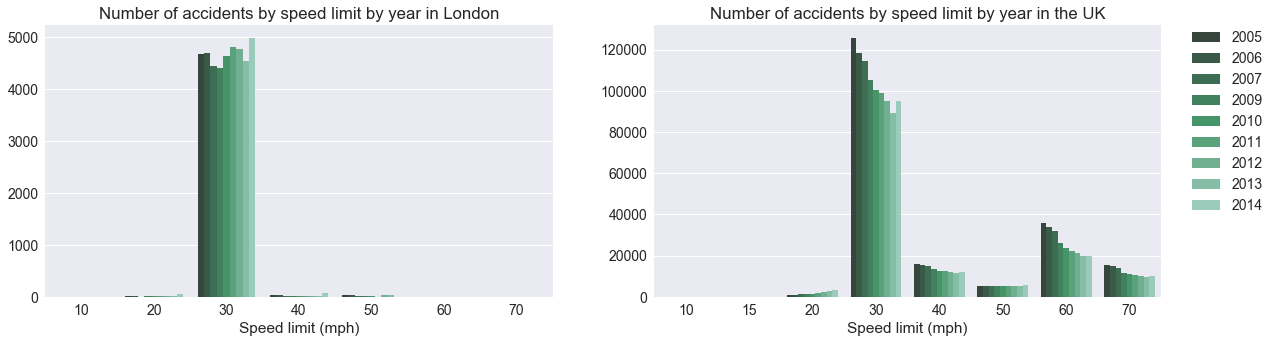

In [26]:
# casualties by year in London
grp_london = df_london.groupby(["Year", "Speed_limit"])
grp_london = grp_london.size().reset_index(name='counts')

# casualties by year in UK
grp_uk = df_acc.groupby(["Year", "Speed_limit"])
grp_uk = grp_uk.size().reset_index(name='counts')

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Speed_limit", y = "counts", hue = "Year", palette="BuGn_d", 
                    data= grp_london)
bplot.set_title("Number of accidents by speed limit by year in London")
bplot.set_xlabel("Speed limit (mph)")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(1, 2, 2)
bplot = sns.barplot(x = "Speed_limit", y = "counts", hue = "Year", palette="BuGn_d", 
                    data= grp_uk)
bplot.set_title("Number of accidents by speed limit by year in the UK")
bplot.set_xlabel("Speed limit (mph)")
bplot.set_ylabel("")
# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Yes we are. But we also learn something new: most of the accidents in London happen on streets with speed limit of 30 miles per hour. This is probably due to the fact that most streets in London have that speed limit. The same is true in the whole of the UK, but quite a few accidents happen also on faster roads. Is there a correlation between the speed limit and the severity of the accidents?

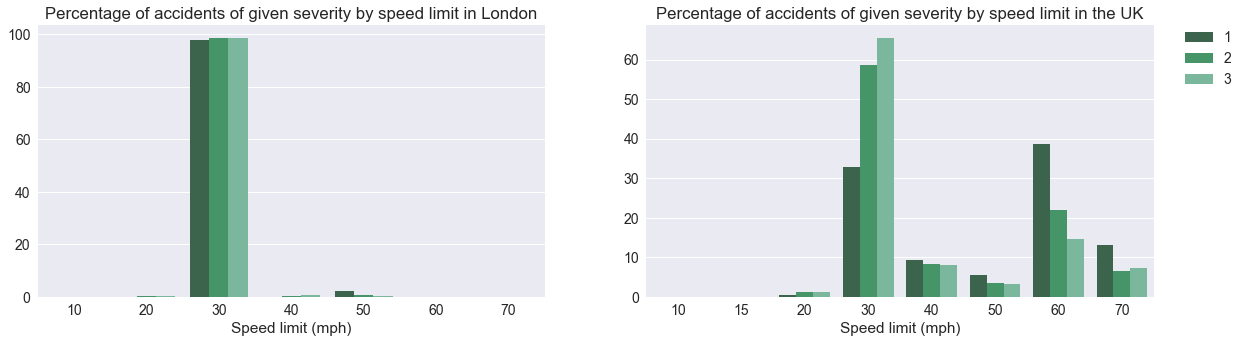

In [27]:
# accident severity and speed limit in London
grp_london = df_london.groupby(["Speed_limit", "Accident_Severity"])
grp_london = grp_london.size().reset_index(name='counts')

# accident severity and speed limit in UK
grp_uk = df_acc.groupby(["Speed_limit", "Accident_Severity"])
grp_uk = grp_uk.size().reset_index(name='counts')

# define function to calculate rates
def rates(x):
    rate = 100*x["counts"] / x["counts"].sum()
    return rate

london_barplot = grp_london.groupby("Accident_Severity").apply(rates).reset_index()
london_barplot["level_1"] = list(grp_london["Speed_limit"][london_barplot["level_1"]])
london_barplot = london_barplot.rename(index=str, columns={"level_1": "Speed_limit"})

uk_barplot = grp_uk.groupby("Accident_Severity").apply(rates).reset_index()
uk_barplot["level_1"] = list(grp_uk["Speed_limit"][uk_barplot["level_1"]])
uk_barplot = uk_barplot.rename(index=str, columns={"level_1": "Speed_limit"})

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
bplot = sns.barplot(x = "Speed_limit", y = "counts", hue = "Accident_Severity", palette="BuGn_d", 
                    data = london_barplot)
bplot.set_title("Percentage of accidents of given severity by speed limit in London")
bplot.set_xlabel("Speed limit (mph)")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(1, 2, 2)
bplot = sns.barplot(x = "Speed_limit", y = "counts", hue = "Accident_Severity", palette="BuGn_d", 
                    data = uk_barplot)
bplot.set_title("Percentage of accidents of given severity by speed limit in the UK")
bplot.set_xlabel("Speed limit (mph)")
bplot.set_ylabel("")
# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As illustrated in the barplots above, in London almost all accidents of all severities occur in roads with a speed limit of 30 mph. This is perhaps not very surprising. On the other hand, in the UK the distribution is more multidimensional, with accidents of severity 1 occurring mostly on faster roads.

### Traffic vs accidents

To conclude, let us turn our attention to the relation between traffic and accidents. Can we predict the number of accidents based solely on the number of cars on the road? Or is there a more subtle relation, perhaps with more factors coming into play?  

The traffic data available contains the number of vehicles on the road, sorted by their type. Without trying to understand what the name of each vehicle category corresponds to, we can plot the number of vehicles on the road per category and try to visualise if it is a good proxy for the number of accidents:

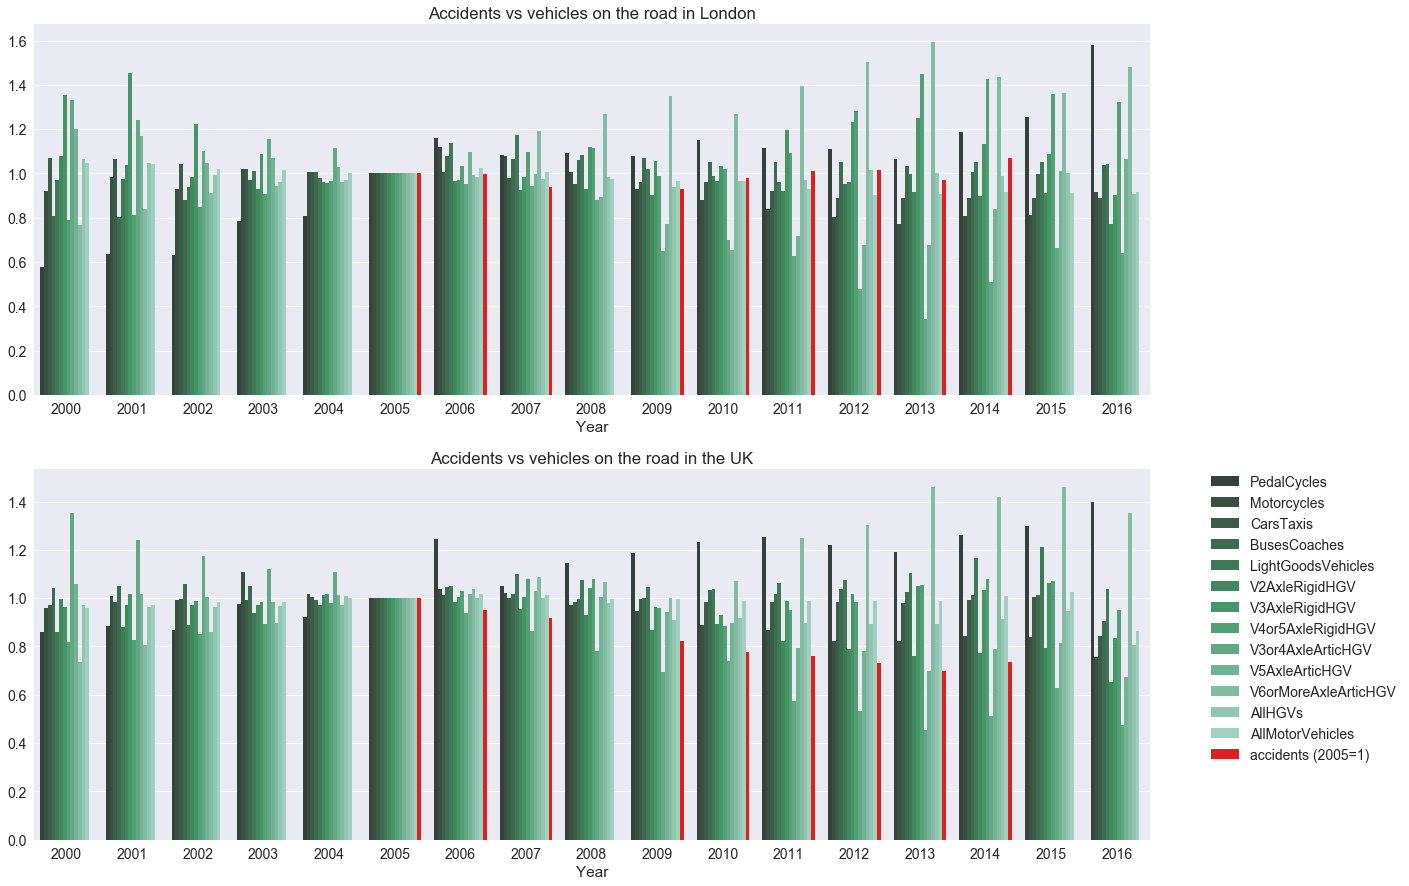

In [28]:
# number of accidents
acc_london = df_london.groupby("Year")
acc_london = acc_london.size().reset_index(name='counts')
acc_london["counts"] = acc_london.counts/acc_london.counts[0]
acc_london = acc_london.rename(columns = {"counts" : 'accidents (2005=1)'})

acc_uk = df_acc.groupby("Year")
acc_uk = acc_uk.size().reset_index(name='counts')
acc_uk["counts"] = acc_uk.counts/acc_uk.counts[0]
acc_uk = acc_uk.rename(columns = {"counts" : 'accidents (2005=1)'})

# select columns of all types of vehicles and sum by year
d = {value : "sum" for value in list(df_traffic)[14:27]}

traffic_london = df_traffic[df_traffic["Region"] == "London"].groupby(["AADFYear"])
traffic_london = traffic_london.agg(d).reset_index()
traffic_london = traffic_london.rename(columns = {"AADFYear" : "Year"})

traffic_uk = df_traffic.groupby(["AADFYear"])
traffic_uk = traffic_uk.agg(d).reset_index()
traffic_uk = traffic_uk.rename(columns = {"AADFYear" : "Year"})

# normalize all vechicles counts so that 2005 = 1
traffic_london.iloc[:,1:14] = traffic_london.iloc[:,1:14]/traffic_london.iloc[5,1:14]
traffic_uk.iloc[:,1:14] = traffic_uk.iloc[:,1:14]/traffic_uk.iloc[5,1:14]

# merged data
acc_tr_lon = pd.merge(traffic_london, acc_london, on='Year', how='outer')
acc_tr_uk = pd.merge(traffic_uk, acc_uk, on='Year', how='outer')

# order for barplots
london_barplot = pd.melt(acc_tr_lon, id_vars="Year", var_name="l1", value_name="l2")
uk_barplot = pd.melt(acc_tr_uk, id_vars="Year", var_name="l1", value_name="l2")

bar_palette = sns.color_palette("BuGn_d", 13)
bar_palette.append((1,0,0))

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)
bplot = sns.barplot(x = "Year", y = "l2", hue = "l1", palette=bar_palette, 
                    data = london_barplot)
bplot.set_title("Accidents vs vehicles on the road in London")
bplot.set_xlabel("Year")
bplot.set_ylabel("")
bplot.legend_.remove()

plt.subplot(2, 1, 2)
bplot = sns.barplot(x = "Year", y = "l2", hue = "l1", palette=bar_palette, 
                    data = uk_barplot)
bplot.set_title("Accidents vs vehicles on the road in the UK")
bplot.set_xlabel("Year")
bplot.set_ylabel("")
# Put the legend out of the figure
bplt = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The barplots above are somewhat unclear: whereas some vehicle categories seem not to affect the number of accidents, others look correlated. Notice that the accident data is available for just 9 years, implying that it is impossible to conclude from this data alone yearly trends with good confidence. Maybe looking at shorter time intervals we can come up with a predictive model for accident rates?  

It's all for now!